In [22]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

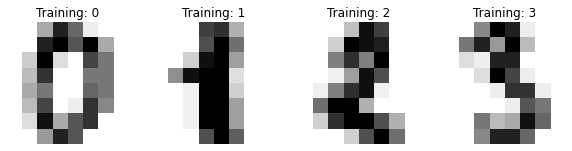

In [23]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [24]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.75, shuffle=False
)

## SVM

In [25]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [26]:
# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# for ax, image, prediction in zip(axes, X_test, predicted):
#     ax.set_axis_off()
#     image = image.reshape(8, 8)
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title(f"Prediction: {prediction}")

In [27]:
# print(
#     f"Classification report for classifier {clf}:\n"
#     f"{metrics.classification_report(y_test, predicted)}\n"
# )
metrics.accuracy_score(y_test, predicted)

0.9480712166172107

Confusion matrix:
[[130   0   0   0   1   0   0   0   0   0]
 [  0 128   2   0   0   1   2   0   3   1]
 [  0   0 125   0   0   0   0   1   0   5]
 [  0   0   1 115   0   3   0   3   8   6]
 [  0   0   0   0 132   0   0   3   0   4]
 [  0   0   0   0   2 127   1   0   0   6]
 [  1   1   0   0   0   0 136   0   0   0]
 [  0   0   0   0   0   0   0 132   1   1]
 [  0   4   0   0   0   0   0   0 123   3]
 [  0   3   0   1   0   1   0   0   1 130]]


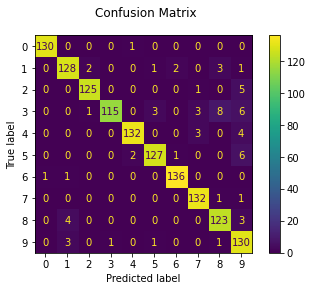

In [28]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## Gaussian Process Classifier

See also 
https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_compare_gpr_krr.html#sphx-glr-auto-examples-gaussian-process-plot-compare-gpr-krr-py -- this one
https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py
https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpc_xor.html#sphx-glr-auto-examples-gaussian-process-plot-gpc-xor-py


In [29]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct

In [30]:
kernels = 1.0 * RBF(length_scale=250)

# Create a classifier: a Gaussian Process classifier
clf = GaussianProcessClassifier(kernel=kernels, warm_start=True)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Confusion matrix:
[[130   0   0   0   1   0   0   0   0   0]
 [  0 120   2   0   0   1   3   0   9   2]
 [  2   0 117   4   0   0   0   1   0   7]
 [  0   0   0 112   0   4   0   3   4  13]
 [  0   0   0   0 131   0   0   4   0   4]
 [  1   0   0   0   3 121   2   0   0   9]
 [  2   0   0   0   0   0 136   0   0   0]
 [  0   0   0   0   0   0   0 129   1   4]
 [  0   7   0   0   0   5   3   0 113   2]
 [  1   2   0   1   0   2   0   1   0 129]]


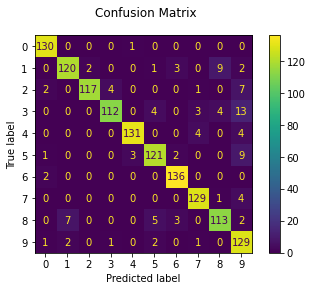

In [31]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [32]:
metrics.accuracy_score(y_test, predicted)

0.9183976261127597